In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline
import os

import numpy as np
from matplotlib import pyplot as plt

plt.rcParams['figure.figsize'] = [8, 6]
from metavision_core.event_io import RawReader, EventDatReader
from metavision_ml.preprocessing import histo
from metavision_ml.preprocessing.viz import viz_histo

from process_led import process_raws
from process_led import find_freq_and_peaks

['filtered/uvled_freq_dataset/recordings/2.5k/0_5/0/recording_2024-10-02_11-20-10.raw_led0.dat', 'filtered/uvled_freq_dataset/recordings/2.5k/0_5/0/recording_2024-10-02_11-20-30.raw_led1.dat', 'filtered/uvled_freq_dataset/recordings/2.5k/0_5/0/recording_2024-10-02_11-20-10.raw_led1.dat', 'filtered/uvled_freq_dataset/recordings/2.5k/0_5/0/recording_2024-10-02_11-20-19.raw_led0.dat', 'filtered/uvled_freq_dataset/recordings/2.5k/0_5/0/recording_2024-10-02_11-20-19.raw_led1.dat', 'filtered/uvled_freq_dataset/recordings/2.5k/0_5/0/recording_2024-10-02_11-20-30.raw_led0.dat', 'filtered/uvled_freq_dataset/recordings/2.5k/0_5/45/recording_2024-10-02_11-20-53.raw_led2.dat', 'filtered/uvled_freq_dataset/recordings/2.5k/0_5/45/recording_2024-10-02_11-21-10.raw_led3.dat', 'filtered/uvled_freq_dataset/recordings/2.5k/0_5/45/recording_2024-10-02_11-21-01.raw_led2.dat', 'filtered/uvled_freq_dataset/recordings/2.5k/0_5/45/recording_2024-10-02_11-20-53.raw_led3.dat', 'filtered/uvled_freq_dataset/record

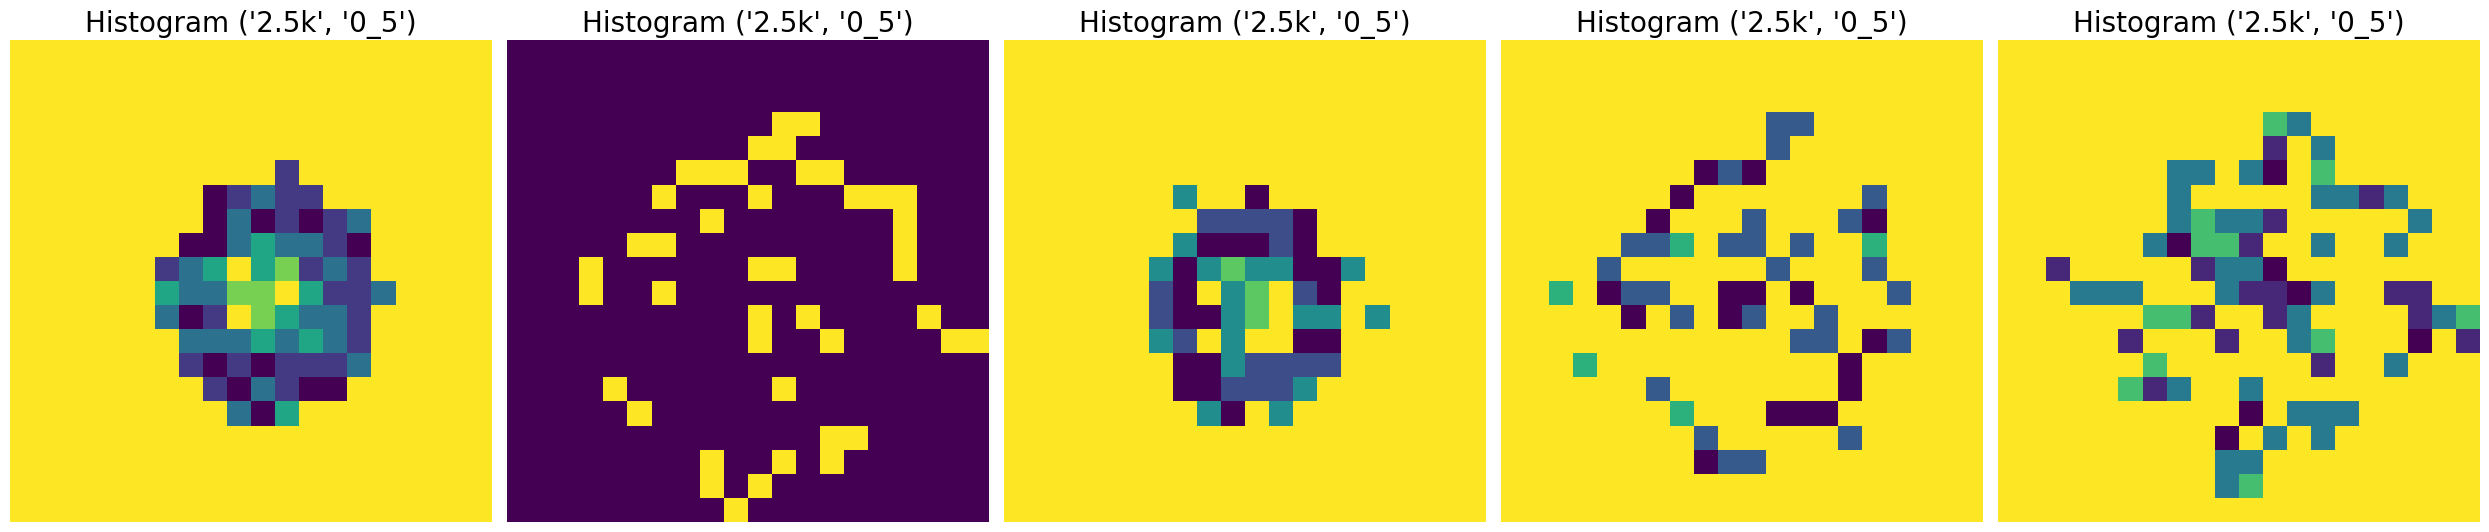

In [3]:
dir_path = ["filtered", "uvled_freq_dataset", "recordings"]
freqs = ["2.5k", "5k", "10k", "20k"]
#freqs = ["5k"]
subdirs = [
	"0_5",
	"1",
	"1_5",
	"2",
	"2_5"
]

#load all files from the subdirs (in each subdir there are two folders 0 and 45, load 0 only for now) dirpath/<freqs>/subdir/0

filenames = []
for freq in freqs:
	for subdir in subdirs:
		for angle in ["0", "45"]:
			dir = os.path.join(*dir_path, freq, subdir, angle)
			files = os.listdir(dir)
			files = [os.path.join(dir, f) for f in files]
			filenames.extend(files)

print(filenames)

files = filenames[:5]

#load the first file
raws = [EventDatReader(f) for f in files]

#the lable is the frequency and the distance
lables = [(f.split("/")[-4], f.split("/")[-3]) for f in files]

led = process_raws(raws, lables)


['filtered/uvled_freq_dataset/recordings/5k/1/45/recording_2024-10-02_10-29-15.raw_led0.dat'
 'filtered/uvled_freq_dataset/recordings/10k/1/0/recording_2024-10-02_10-21-46.raw_led0.dat'
 'filtered/uvled_freq_dataset/recordings/10k/1_5/45/recording_2024-10-02_10-19-09.raw_led0.dat'
 'filtered/uvled_freq_dataset/recordings/5k/0_5/45/recording_2024-10-02_10-27-47.raw_led3.dat'
 'filtered/uvled_freq_dataset/recordings/2.5k/0_5/0/recording_2024-10-02_11-20-10.raw_led0.dat']


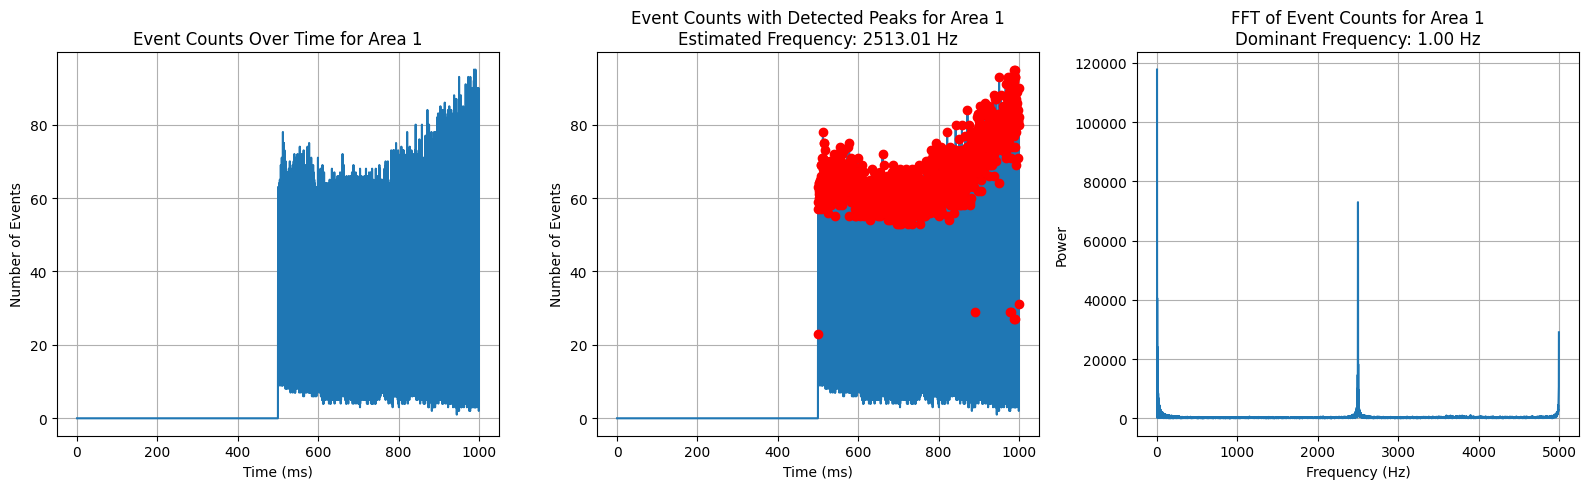

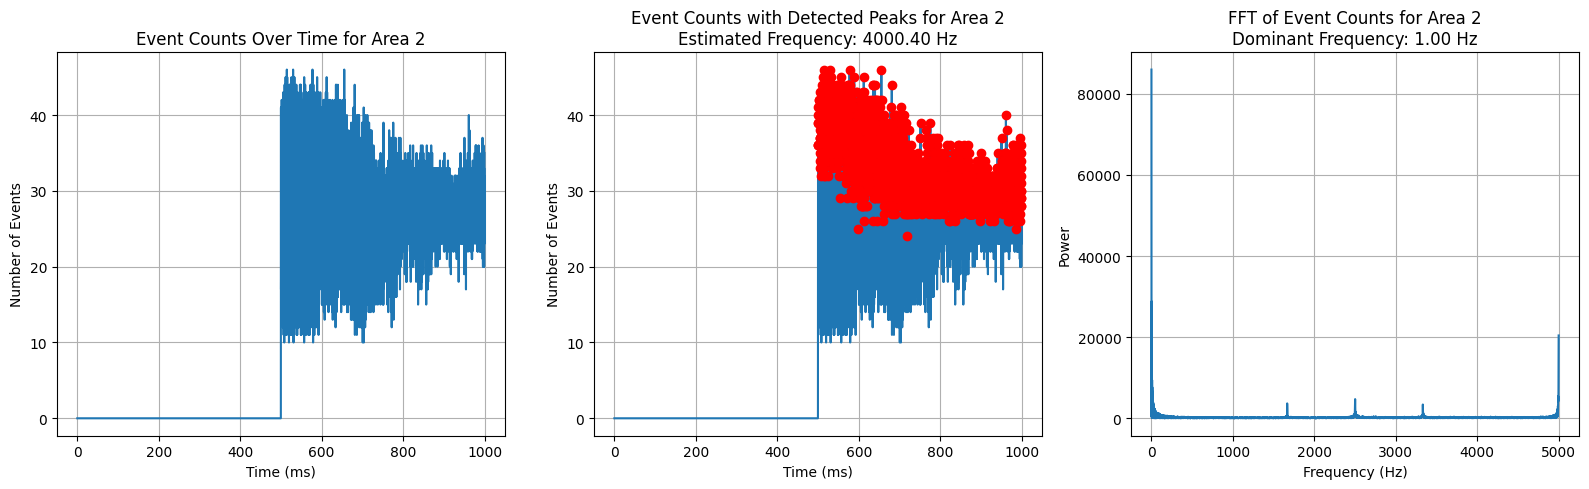

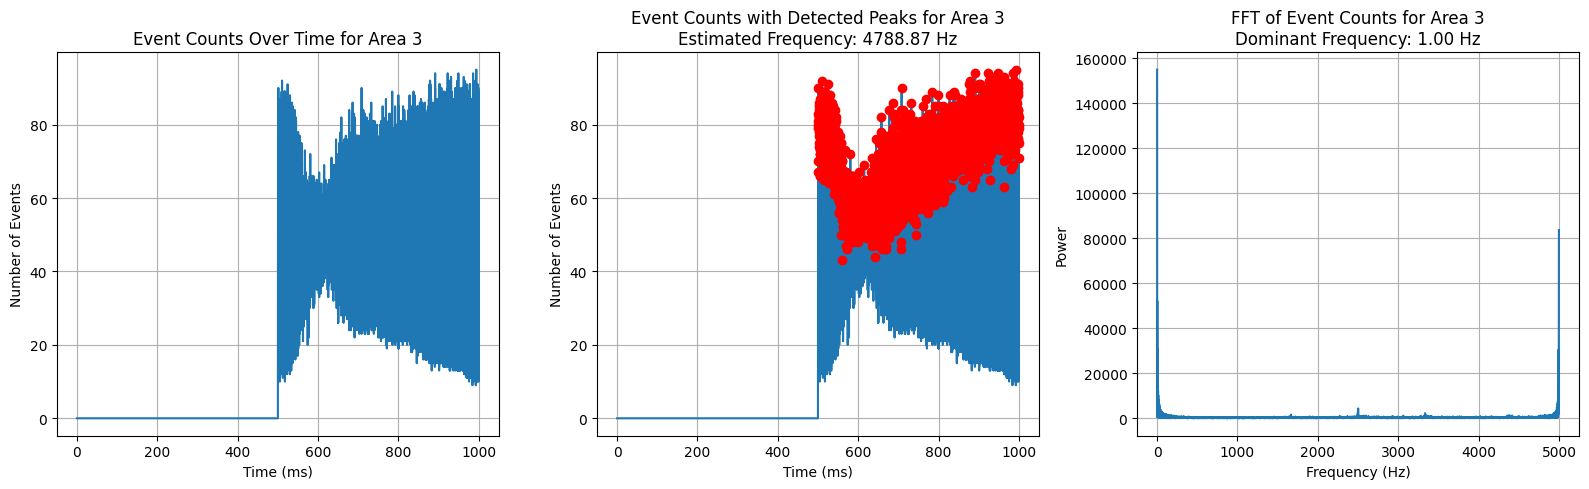

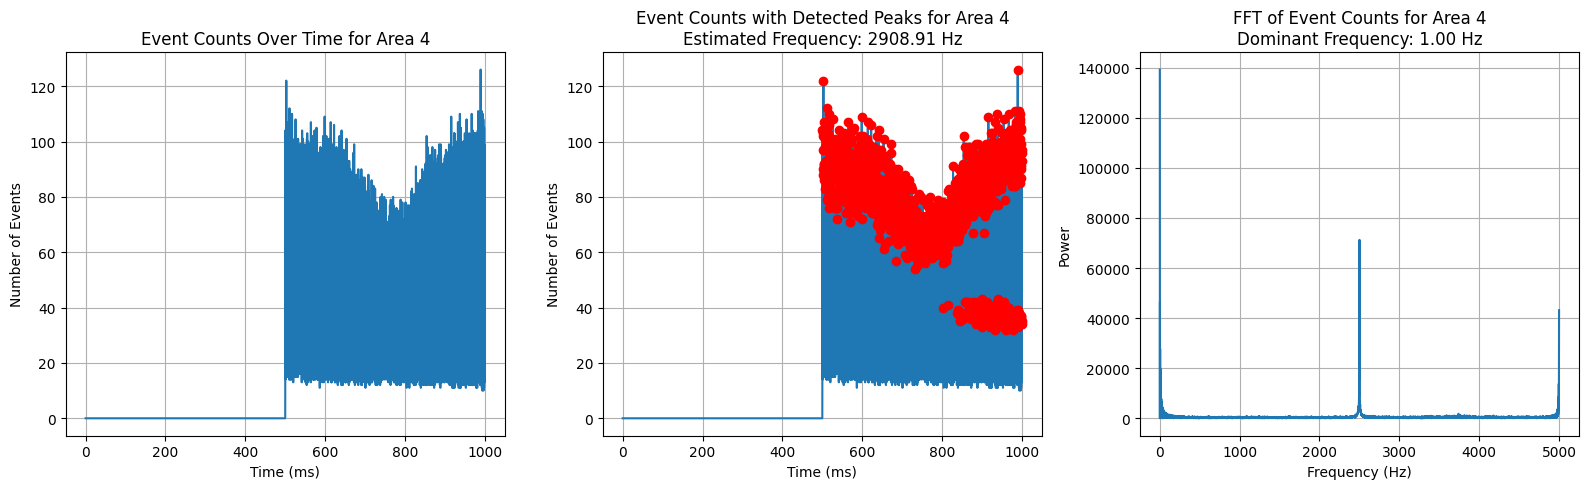

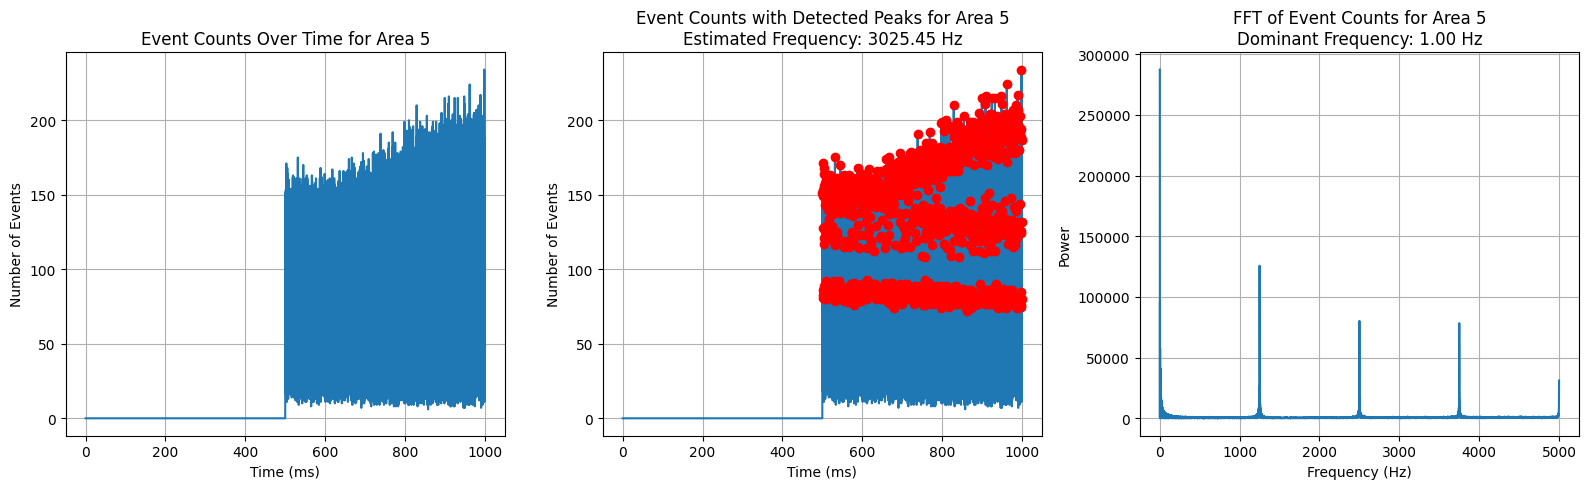

In [16]:
#select 5 random files

rnd_files = np.random.choice(filenames, 5)

print(rnd_files)

raws = [EventDatReader(f) for f in rnd_files]

find_freq_and_peaks(raws)

['filtered/uvled_freq_dataset/recordings/1k/0_5/0/recording_2024-10-02_11-23-21.raw_led1.dat', 'filtered/uvled_freq_dataset/recordings/1k/1/0/recording_2024-10-02_11-24-20.raw_led0.dat', 'filtered/uvled_freq_dataset/recordings/1k/1_5/0/recording_2024-10-02_11-25-25.raw_led0.dat', 'filtered/uvled_freq_dataset/recordings/1k/2/0/recording_2024-10-02_11-28-03.raw_led1.dat', 'filtered/uvled_freq_dataset/recordings/1k/2_5/0/recording_2024-10-02_11-28-47.raw_led0.dat', 'filtered/uvled_freq_dataset/recordings/2.5k/0_5/0/recording_2024-10-02_11-20-30.raw_led0.dat', 'filtered/uvled_freq_dataset/recordings/2.5k/1/0/recording_2024-10-02_11-19-19.raw_led1.dat', 'filtered/uvled_freq_dataset/recordings/2.5k/1_5/0/recording_2024-10-02_11-14-51.raw_led0.dat', 'filtered/uvled_freq_dataset/recordings/2.5k/2/0/recording_2024-10-02_11-13-56.raw_led0.dat', 'filtered/uvled_freq_dataset/recordings/2.5k/2_5/0/recording_2024-10-02_11-11-28.raw_led0.dat', 'filtered/uvled_freq_dataset/recordings/5k/0_5/0/recordin

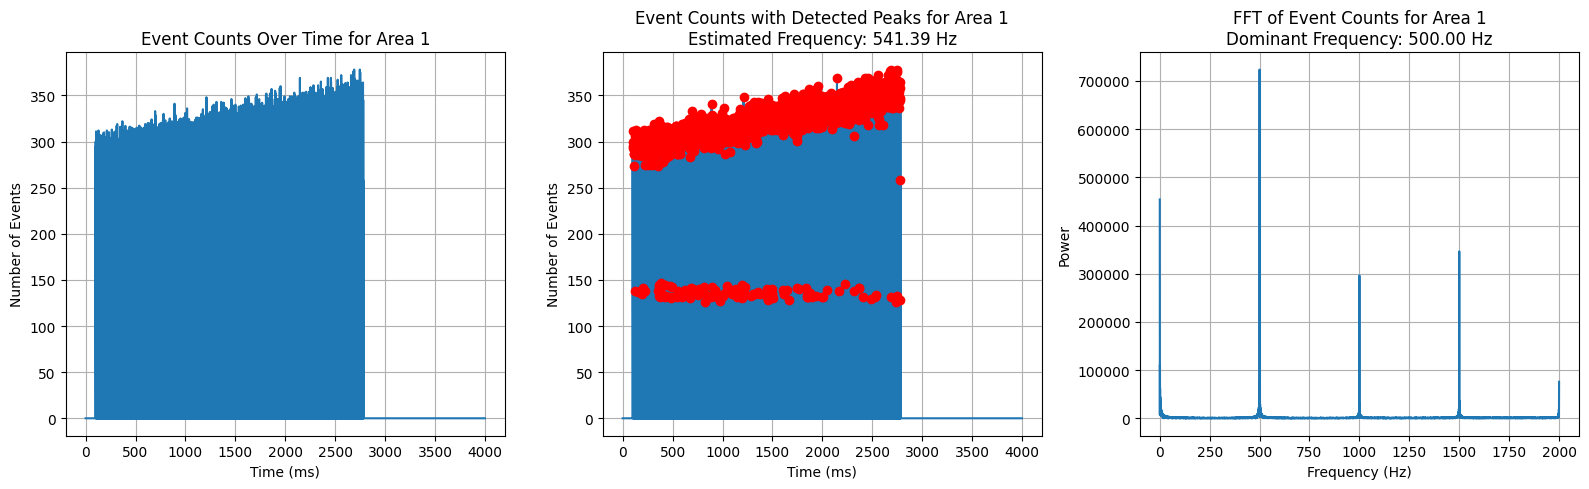

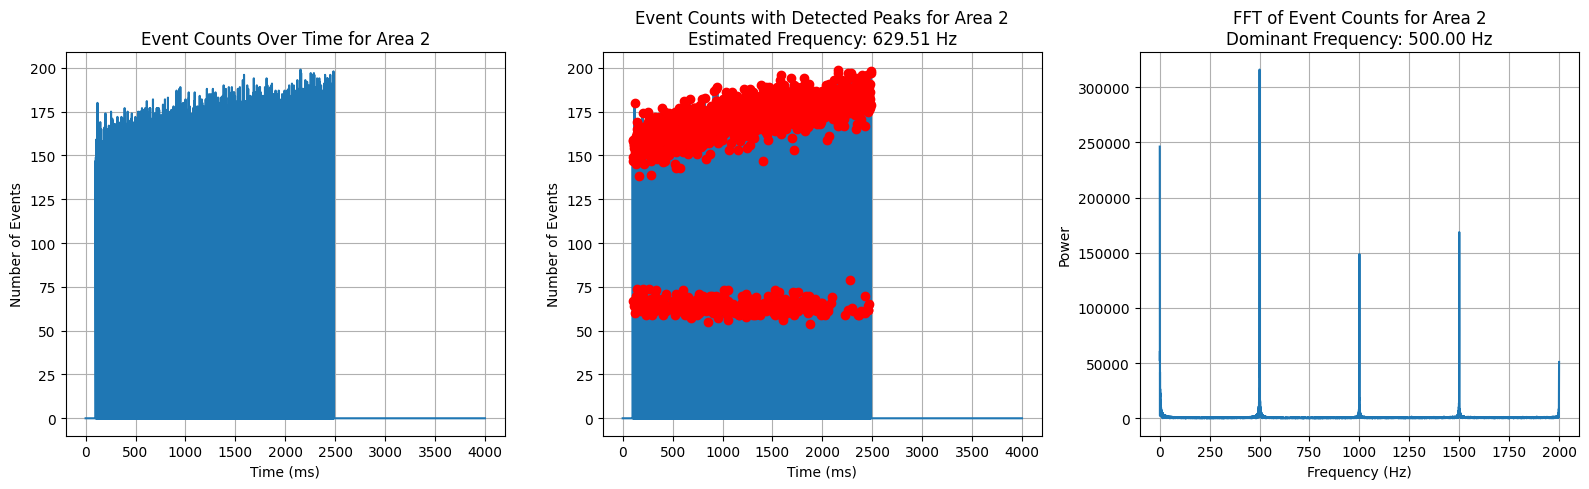

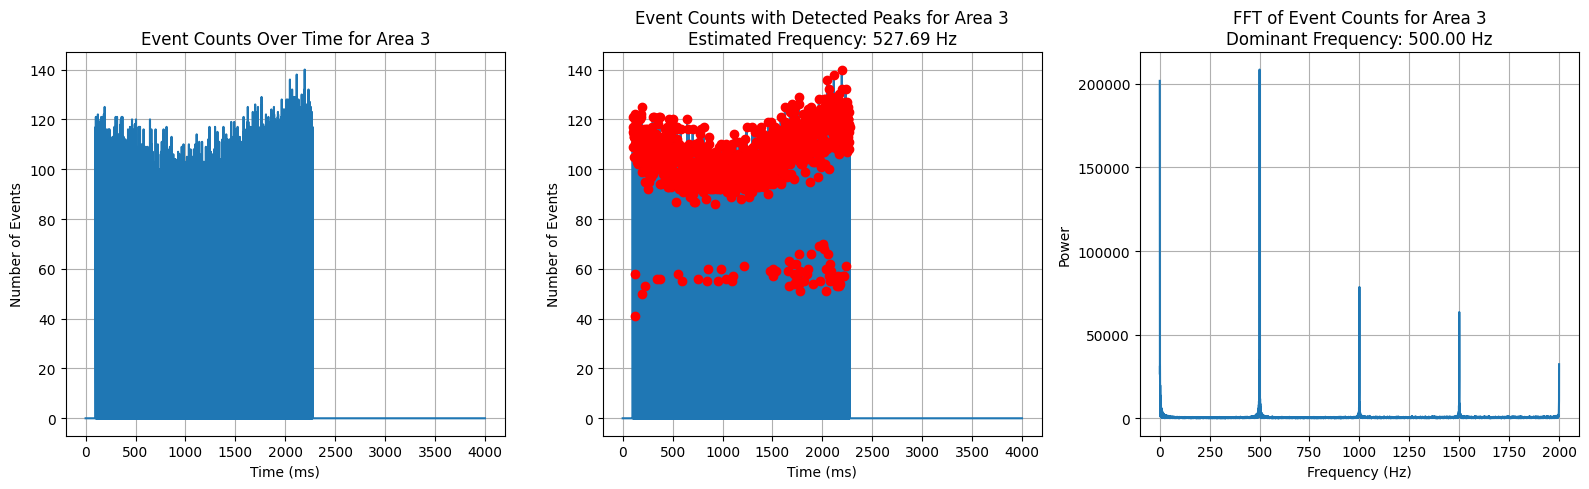

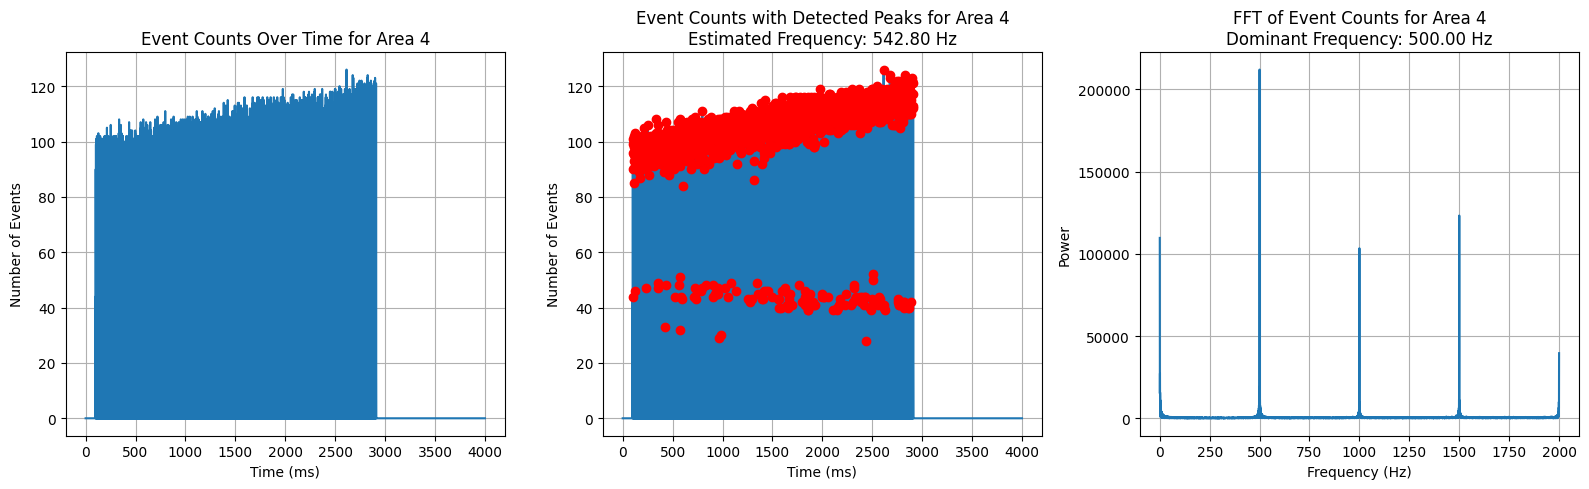

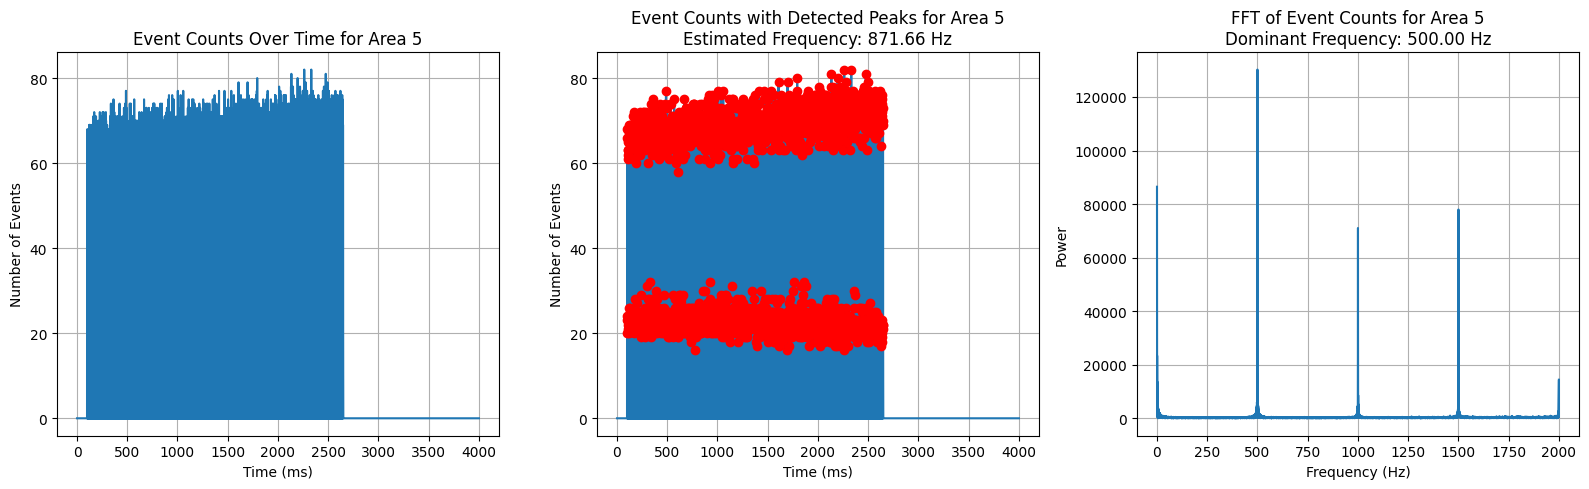

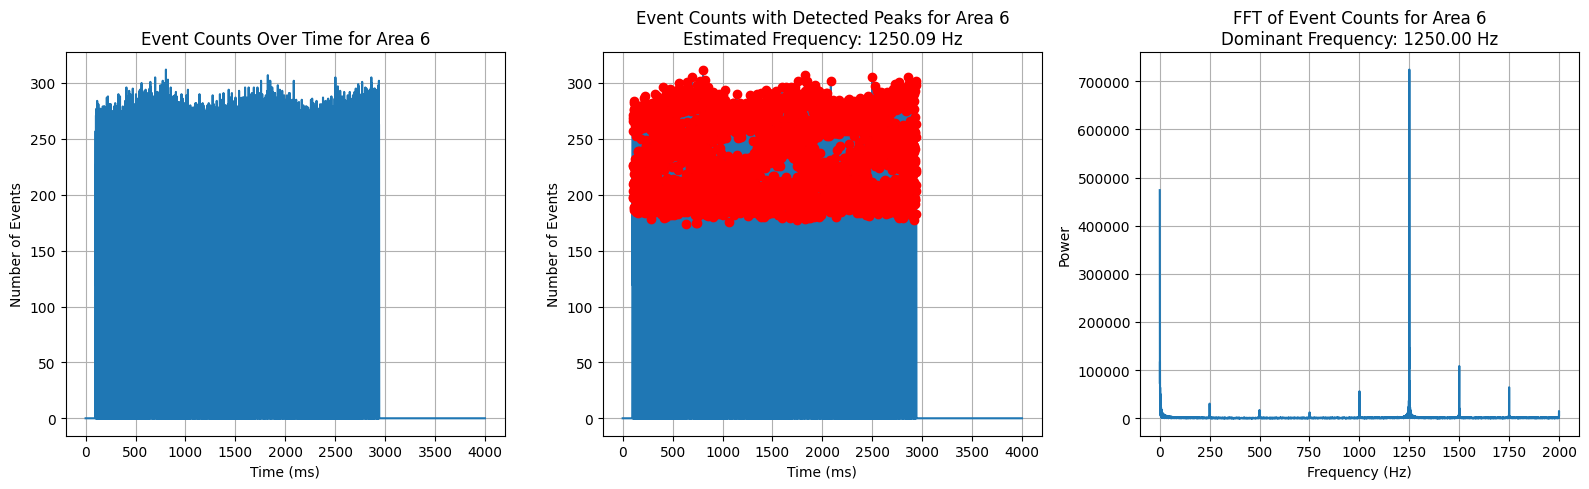

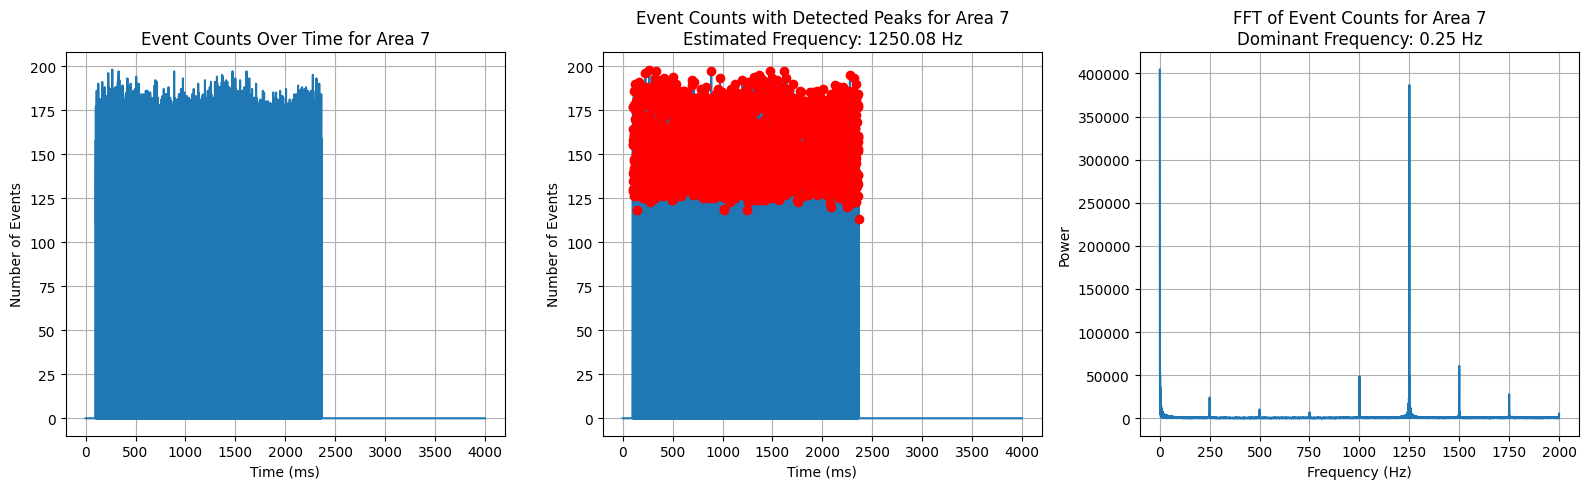

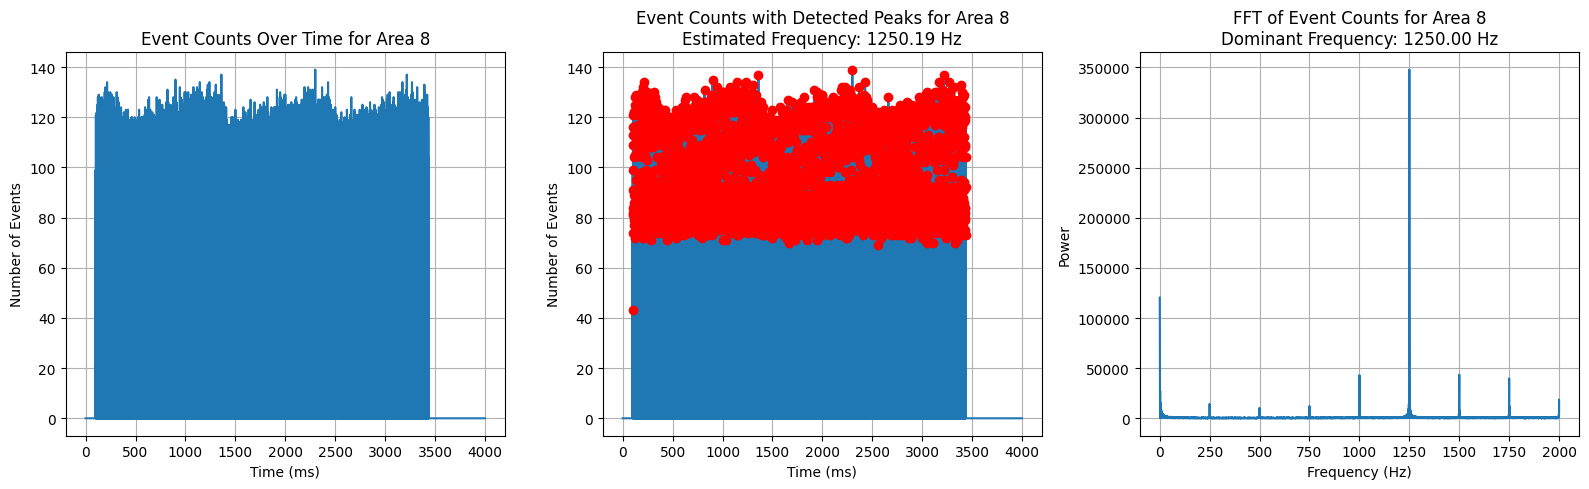

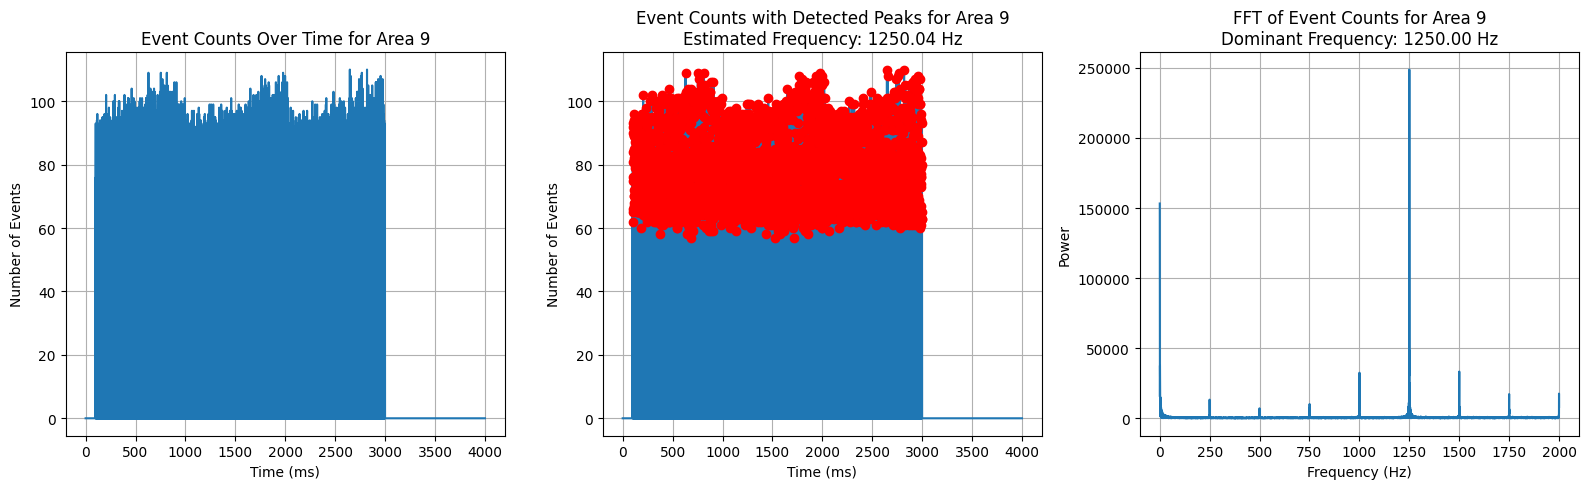

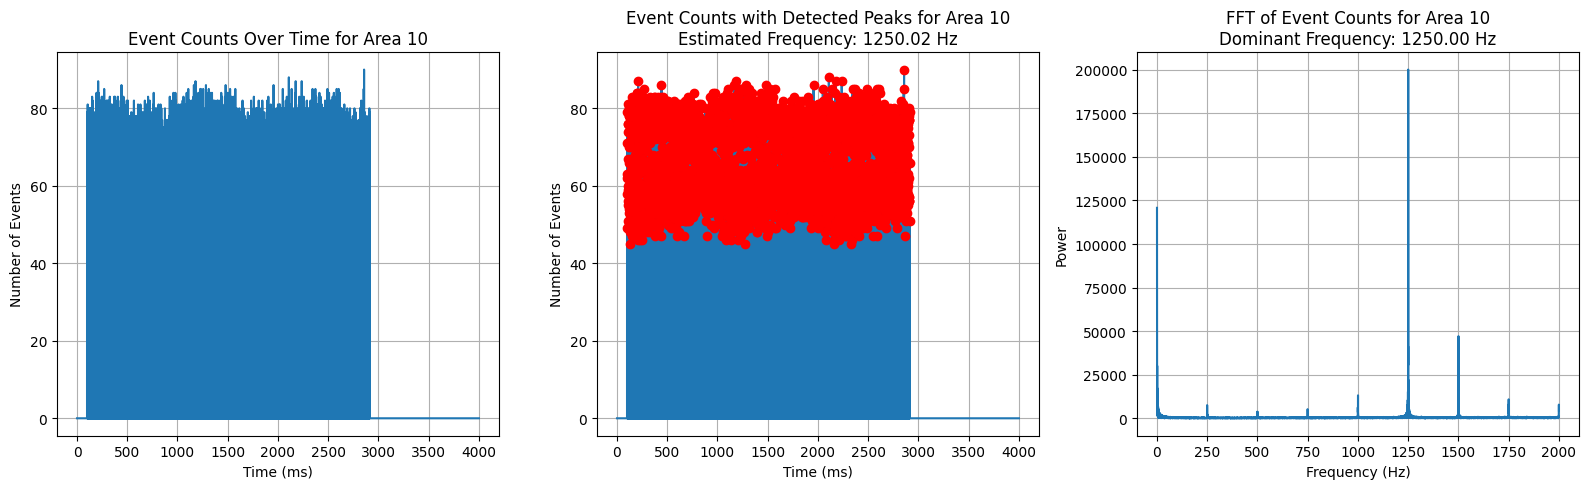

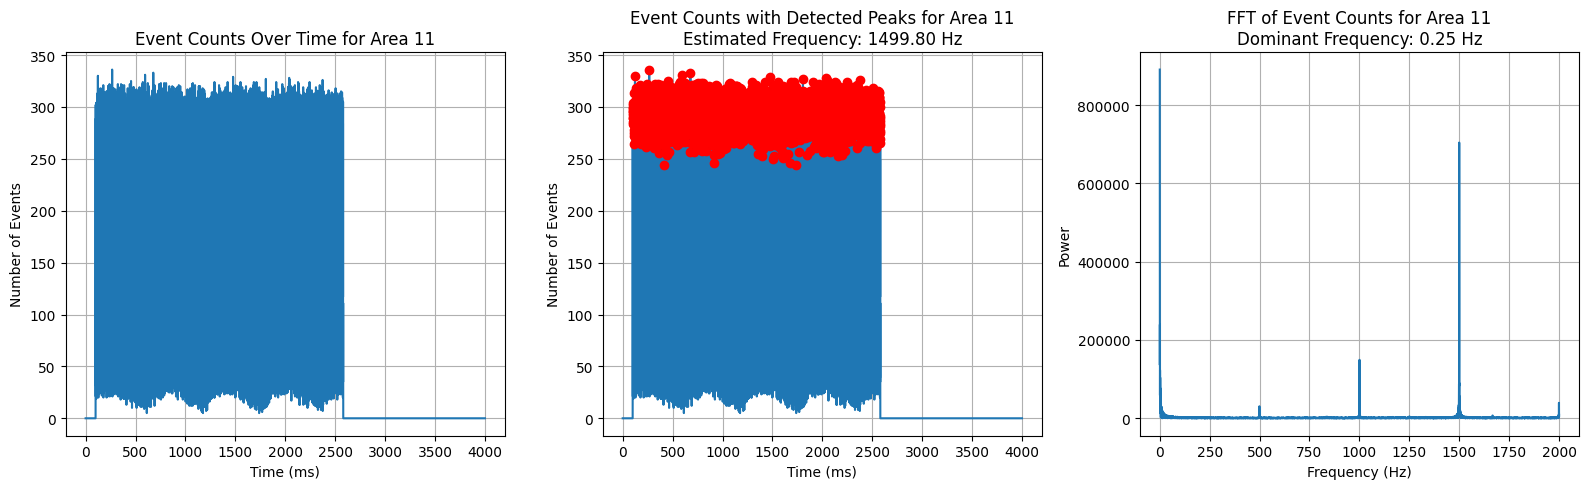

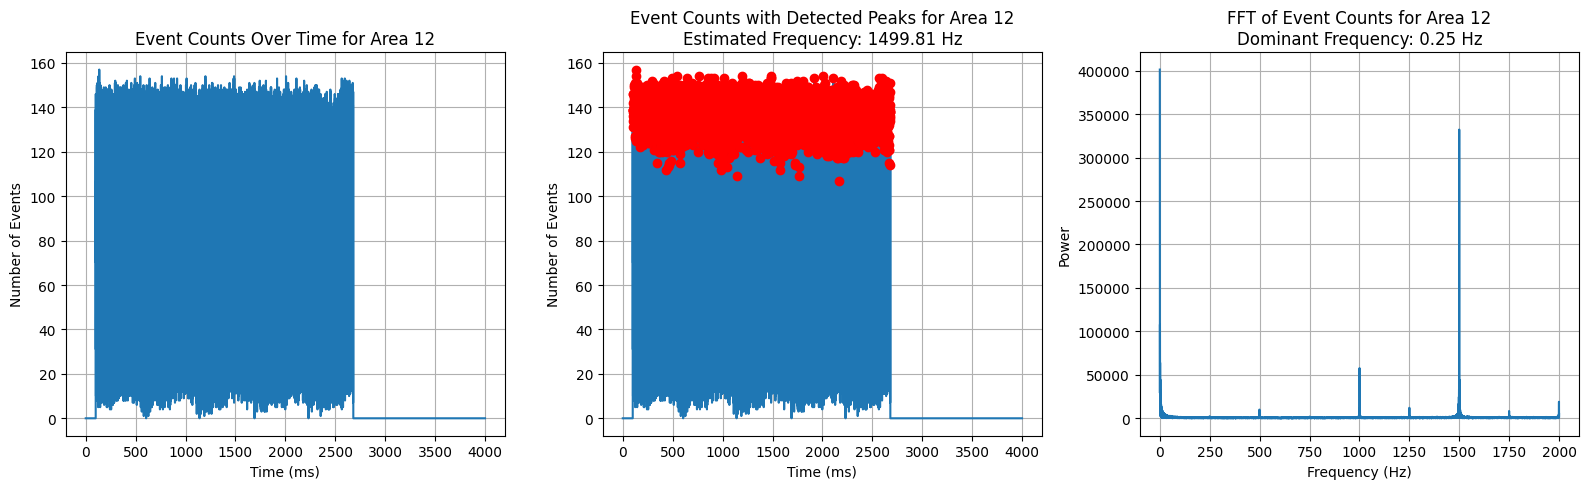

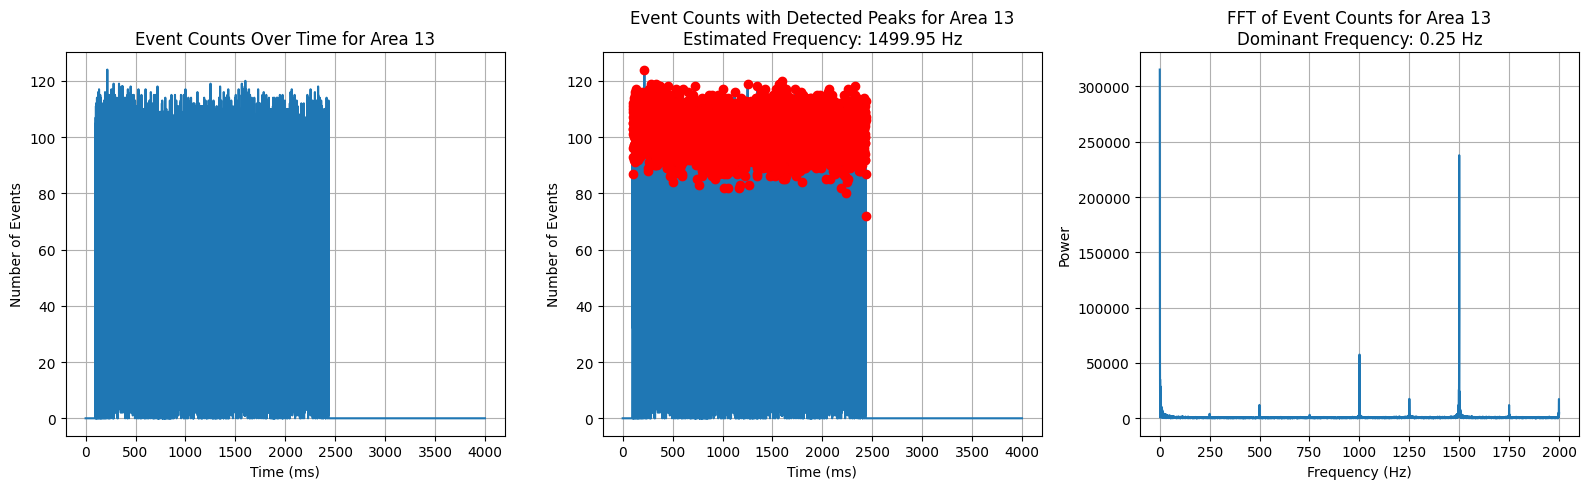

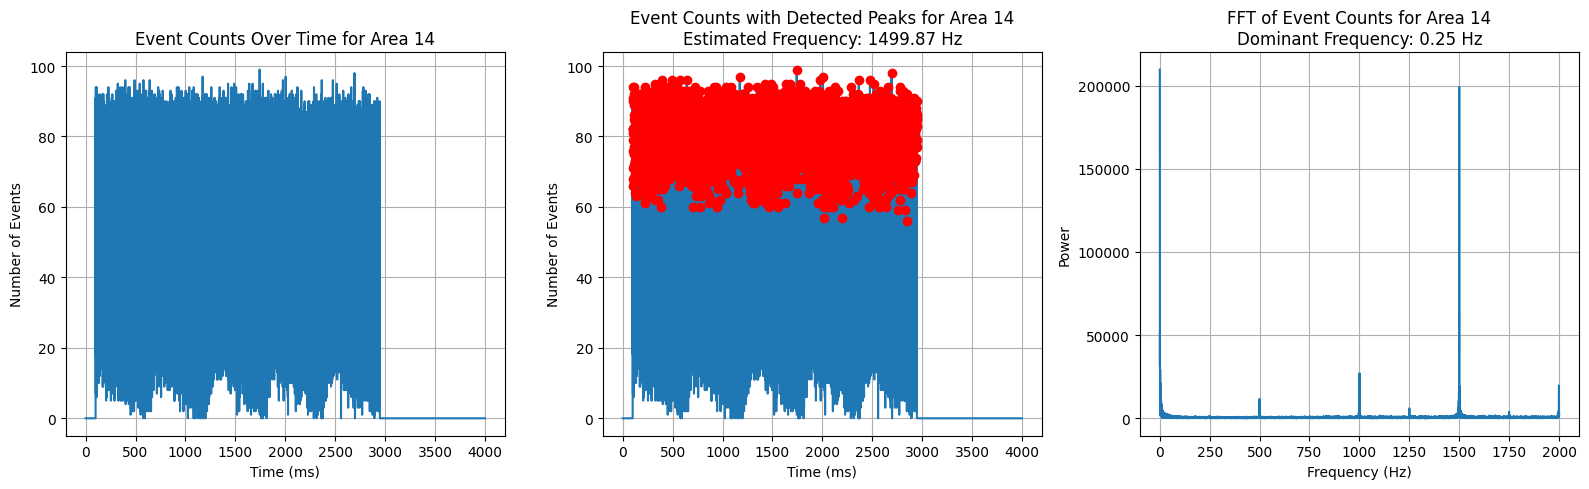

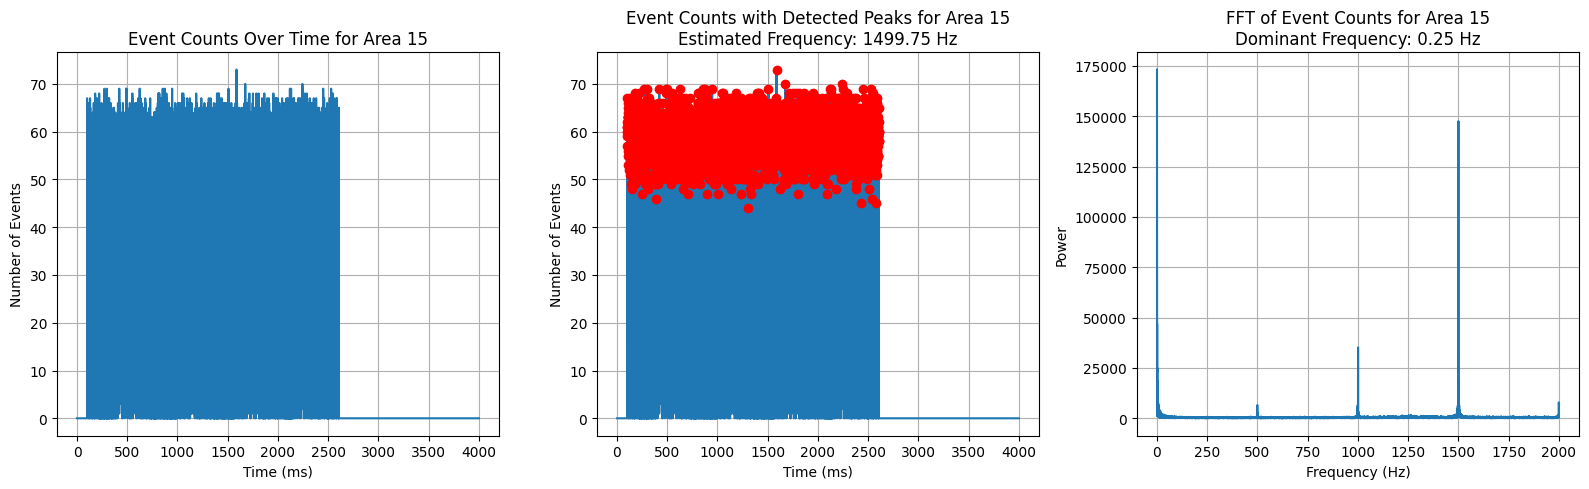

In [32]:
#from each frequency/distance/angle select a random file
#that means there will be each frequency/distance/angle combination once

dir_path = ["filtered", "uvled_freq_dataset", "recordings"]
freqs = ["1k", "2.5k", "5k"]
#freqs = ["5k"]
subdirs = [
	"0_5",
	"1",
	"1_5",
	"2",
	"2_5"
]

rnd_files = []
for freq in freqs:
	for subdir in subdirs:
		for angle in ["0"]:
			dir_combination = os.path.join(*dir_path, freq, subdir, angle)
			if os.path.exists(dir_combination):
				files = os.listdir(dir_combination)
				if files:
					files = [os.path.join(dir_combination, f) for f in files]
					rnd_file = np.random.choice(files)
					rnd_files.append(rnd_file)
				else:
					print(f"No files found in directory: {dir_combination}")
			else:
				print(f"Directory does not exist: {dir_combination}")

raws = [EventDatReader(f) for f in rnd_files]

print(rnd_files)

find_freq_and_peaks(raws)